In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project"
%ls

/content/drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project
'60 40 Wt Port.ipynb'
 CPIAUCNS.csv
'CPI_S&P.ipynb'
 df1_monthly.csv
'DF Data.csv'
'DF Equal Weight.csv'
'DF Inflation Beta.csv'
'DF SixFour Weight.csv'
'DF VolWt.csv'
 EqWeight.ipynb
'Excel Files'/
 filtered_df1.csv
 InflationBeta.ipynb
 Inflationolsregression.ipynb
'Inflation OLS Regression.ipynb'
 Inflation_VolWt.ipynb
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.gdoc
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.pdf
'Multi-Asset Portfolio Final.ipynb'
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.gdoc
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.pdf
'S&P500 Features Data.csv'
'SP Composite 1500.csv'
'SP GSCI Copper.csv'
'SP GSCI Crude Oil.csv'
'SP GSCI.csv'
'SP GSCI Gold.csv'
'SP United States REIT.csv'
'SP U.S. Aggregate Bond Index.csv'
'SP U.S. TIPS Index.csv'
 US_inflation.csv


In [3]:
from statsmodels.regression.rolling import RollingOLS
from statsmodels.datasets import longley
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline
plt.style.use('seaborn')

In [4]:
# import pandas lib as pd
import pandas as pd
import numpy as np
import datetime as dt
 
# read by default 1st sheet of an excel file
SP1500 = pd.read_csv('SP Composite 1500.csv')
SPCopper = pd.read_csv('SP GSCI Copper.csv')
SPOil = pd.read_csv('SP GSCI Crude Oil.csv')
SPGold = pd.read_csv('SP GSCI Gold.csv')
SPGSCI = pd.read_csv('SP GSCI.csv')
SPBonds = pd.read_csv('SP U.S. Aggregate Bond Index.csv')
SPTips = pd.read_csv('SP U.S. TIPS Index.csv')
SPReit = pd.read_csv('SP United States REIT.csv')
CPI = pd.read_csv('CPIAUCNS.csv')

In [5]:
CPI.head()

,Date,CPI
0,2012-10-01,231.317
1,2012-11-01,230.221
2,2012-12-01,229.601
3,2013-01-01,230.280
4,2013-02-01,232.166


In [6]:
data = [SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit]

In [7]:
for df in data:
    df.set_index('Date', inplace = True)
    df.drop(df.tail(1).index,inplace=True)
    df.index=pd.to_datetime(df.index)
    df.dropna(inplace = True)

In [8]:
CPI['Date'] = pd.to_datetime(CPI['Date'])
CPI['Date'] = CPI['Date'].apply(lambda x: x.strftime('%Y-%m'))
CPI.set_index('Date', inplace = True)
CPI_pct = CPI.pct_change()
CPI_pct *= 100
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [9]:
CPI.tail(3)

,CPI
Date,
2022-08,296.171
2022-09,296.808
2022-10,298.012


In [10]:
result = pd.concat([SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit], axis=1)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10-31,325.40,550.02,472.65,1000.87,637.74,176.06,217.48,240.20
2012-11-01,329.30,554.75,477.31,998.78,638.86,175.87,217.35,241.00
2012-11-02,325.99,543.32,465.09,975.31,626.07,175.85,217.07,242.56


In [11]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
for ticker in tickers:
    result[ticker] = result[ticker].pct_change()

In [12]:
result = result.groupby(pd.Grouper(freq='M')).sum().reset_index()
result.head(3)

,Date,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
0,2012-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-11-30,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2,2012-12-31,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [13]:
result['Date'] = result['Date'].apply(lambda x: x.strftime('%Y-%m'))
result.set_index('Date', inplace = True)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [14]:
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [15]:
final_result = pd.concat([result, CPI_pct['CPI']], axis=1)
final_result = final_result.iloc[1:, :]
final_result.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),CPI
Date,,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363,-0.473809
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,-0.269306
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.295730
2013-02,0.011497,-0.043285,-0.056413,-0.051071,-0.040709,0.004699,0.002616,0.010951,0.819003
2013-03,0.036598,-0.034836,0.055649,0.011267,0.010851,0.001038,0.003078,0.024631,0.261451


In [16]:
final_result.shape

(121, 9)

In [17]:
weights = np.array([0.6, 0.4])

In [18]:
final_result.drop(columns = 'CPI', inplace = True)

In [19]:
final_result['60/40'] = final_result[['S&P Composite 1500', 'S&P U.S. Aggregate Bond Index']].dot(weights)
final_result *= 100
final_result.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),60/40
Date,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,0.383323
2012-12,0.945836,-0.761000,3.336160,-2.120430,-0.495040,-0.123241,-0.513191,3.180230,0.518205
2013-01,5.152027,2.934410,6.054883,-0.756875,4.384769,-0.538879,-0.764927,3.461645,2.875664
2013-02,1.149651,-4.328523,-5.641346,-5.107124,-4.070926,0.469874,0.261607,1.095084,0.877740
2013-03,3.659816,-3.483619,5.564867,1.126700,1.085099,0.103780,0.307769,2.463102,2.237401


In [20]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
for ticker in tickers:
    final_result[ticker] = final_result[ticker].cumsum()
final_result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),60/40
Date,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,0.383323
2012-12,1.485129,2.272130,6.747958,-2.400468,1.545501,0.026127,-0.056252,2.643976,0.518205
2013-01,6.637155,5.206540,12.802841,-3.157343,5.930270,-0.512752,-0.821179,6.105622,2.875664


In [21]:
# Export DF
#final_result.to_csv("DF SixFour Weight.csv")

In [22]:
final_result['60/40'] = final_result['60/40'].cumsum()
final_result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),60/40
Date,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,0.383323
2012-12,1.485129,2.272130,6.747958,-2.400468,1.545501,0.026127,-0.056252,2.643976,0.901528
2013-01,6.637155,5.206540,12.802841,-3.157343,5.930270,-0.512752,-0.821179,6.105622,3.777192


In [23]:
final_result.index = pd.to_datetime(final_result.index)
type(final_result.index)

pandas.core.indexes.datetimes.DatetimeIndex

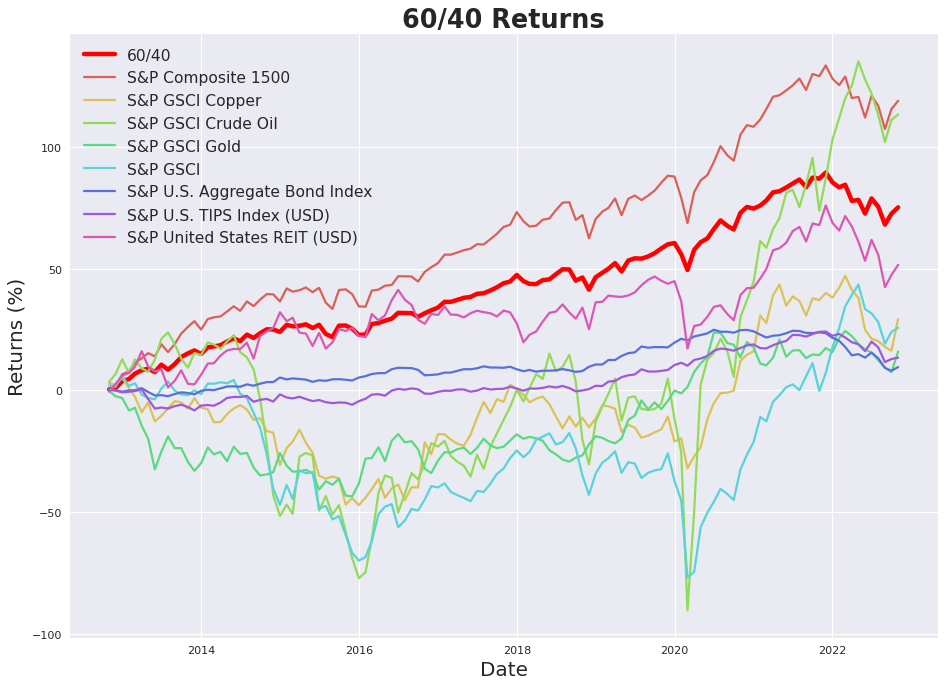

In [24]:
figure(figsize=(14, 10), dpi=80)

palette = sns.color_palette("hls", 8)
sns.set_palette(palette)
sns.set_style('darkgrid')
#plt.style.use('fivethirtyeight')

plt.plot(final_result.index, final_result["60/40"], label = '60/40', linewidth = 4, color = 'red')

vars = ['S&P Composite 1500', 'S&P GSCI Copper', 'S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]
for i in vars:
    plt.plot(final_result.index, final_result[i], label = i, linewidth = 2)

date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.legend(fontsize = 14, loc = 'upper left')
plt.title("60/40 Returns", fontsize = 23, weight = 'bold')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Returns (%)', fontsize = 18)
plt.show()
